# STA 141C Final Project

Group 7

Man Chuen Chau (919819081)




### Analysis of Heart Disease Dataset using Principal Component Analysis

### 1.	  Abstract

Heart disease is a significant public health issue worldwide, and early detection and prevention are critical to reducing the burden of the disease. This project aims to perform a comprehensive analysis of a large dataset of heart disease using principal component analysis (PCA). The objectives of the project are to identify the key indicators that contribute to the development of heart disease, develop a predictive model for heart disease, and reduce the dimension of the dataset. The dataset contains information on personal critical indicators of heart disease, such as age, gender, smoking status, blood pressure, cholesterol levels, etc. The large dataset contains more than 300,000 records and 18 columns. PCA will be used to analyze the dataset, and QR decomposition and Single Valued Decomposition will be used to evaluate PCA. The expected outcomes of the project are the identification of critical indicators of heart disease, the development of a predictive model, and insights into ways to make the analysis more efficient.

### 2.  Introduction

Heart disease is a leading cause of death globally and poses a significant public health challenge. Early detection and prevention of heart disease are crucial to reducing the burden of the disease. The development of predictive models using machine learning techniques can help identify critical indicators of heart disease and aid in early diagnosis and prevention.

This project aims to analyze a large dataset of heart disease using principal component analysis (PCA) to identify key indicators that contribute to the development of heart disease and develop a predictive model for heart disease. The dataset contains information on various personal critical indicators of heart disease, such as age, gender, smoking status, blood pressure, cholesterol levels, etc. The dataset was obtained from Kaggle and contains more than 300,000 records and 18 columns.

PCA is a widely used method for dimensionality reduction that can help identify critical indicators of heart disease by reducing the dimension of the dataset. The project will use QR decomposition and Single Valued Decomposition to evaluate PCA and compare their performance. The outcomes of the project are expected to identify key indicators that contribute to the development of heart disease and develop a predictive model for heart disease using the identified vital indicators. Additionally, the project aims to explore ways to make the analysis more efficient.

The insights gained from this project can be valuable in early diagnosis and prevention of heart disease. The predictive model developed can be used to identify individuals at high risk of developing heart disease and implement appropriate preventive measures. The project outcomes can contribute to the ongoing efforts to reduce the burden of heart disease globally.

In [34]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

random.seed(10)

### 3.	Data

### 3.1 Data Acquisition and Validation

The data file is obtained from the website called 'Kaggle' (Pytlak). The dataset originally come from the CDC which performed an annual CDC survey data of 400k adults related to their health status in 2020 (Pytlak). 


In [35]:
# read the data file
df_raw_data = pd.read_csv('heart_2020_cleaned.csv')

# check if the data file is empty
if(df_raw_data.empty):
    print ('The data file is empty!')
else:
    df_raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122831 entries, 0 to 122830
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      122831 non-null  object 
 1   BMI               122831 non-null  float64
 2   Smoking           122831 non-null  object 
 3   AlcoholDrinking   122831 non-null  object 
 4   Stroke            122831 non-null  object 
 5   PhysicalHealth    122831 non-null  int64  
 6   MentalHealth      122831 non-null  int64  
 7   DiffWalking       122831 non-null  object 
 8   Sex               122831 non-null  object 
 9   AgeCategory       122831 non-null  object 
 10  Race              122831 non-null  object 
 11  Diabetic          122831 non-null  object 
 12  PhysicalActivity  122831 non-null  object 
 13  GenHealth         122831 non-null  object 
 14  SleepTime         122831 non-null  int64  
 15  Asthma            122831 non-null  object 
 16  KidneyDisease     12

In [36]:
# check if there are any missing values
missng_values = df_raw_data.isna().sum()

if (sum(missng_values) > 0):
    print("{} has {} missing value(s)".format(col, missng_values))
else:
    print("No missing values found!")    
    # copy the raw dataset for variable transformation
    df_trans_data = df_raw_data


No missing values found!


### 3.2 Data Description

The dataset has 18 columns. One column is response and the other 17 columns are predictors. All predictors are independent and identically distributed.


| No. |    Column Name   | Regressor |               Description               |                                                            Value                                                            |
|:---:|:----------------:|:---------:|:---------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------:|
| 1   | HeartDisease     | Response  | Have heart disease?     | Yes/No                                                                                                                      |
| 2   | BMI              | Predictor | Body Mass Index                         | Real Number (1-100)                                                                                                         |
| 3   | Smoking          | Predictor | Smoke?                  | Yes/No                                                                                                                      |
| 4   | AlcoholDrinking  | Predictor | Drink alcohol?          | Yes/No                                                                                                                      |
| 5   | Stroke           | Predictor | Have stroke?            | Yes/No                                                                                                                      |
| 6   | PhysicalHealth   | Predictor | The level of physical health            | Integer (0-30)                                                                                                              |
| 7   | MentalHealth     | Predictor | The level of mental health              | Integer (0-30)                                                                                                              |
| 8   | DiffWalking      | Predictor | Have Diff Walking?      | Yes/No                                                                                                                      |
| 9   | Sex              | Predictor | The sex / gender                        | Male/Female                                                                                                                 |
| 10  | AgeCategory      | Predictor | The age                                 | Categories:   18-24,   25-29,   30-34,   35-39,   40-44,    45-49,   50-54,   55-59,   60-64,   65-69,   70-74,   75-79,    80 or older |
| 11  | Race             | Predictor | The race                                | Categories:   American Indian/Alaskan Native,   Asian,   Black,   Hispanic,   White,   Other                                     |
| 12  | Diabetic         | Predictor | Have diabetic?          | Yes/No, No (borderline diabetes), Yes (during pregnancy)                                                                                                                      |
| 13  | PhysicalActivity | Predictor | Have physical activity? | Yes/No                                                                                                                      |
| 14  | GenHealth        | Predictor |                                         | Categories:   Excellent,   Very Good,   Good,   Fair,   Poor                                                                    |
| 15  | SleepTime        | Predictor | How many sleeping hours?                | Integer (1-24)                                                                                                              |
| 16  | Asthma           | Predictor | Have asthma?            | Yes/No                                                                                                                      |
| 17  | KidneyDisease    | Predictor | Have kidney disease?    | Yes/No                                                                                                                      |
| 18  | SkinCancer       | Predictor | Have skin cancer?       | Yes/No                                                                                                                      |




### 3.3 Variable Transformation

Many columns are categorial data / quanlitative predictors. Regression model can only handle numeric variables. Thus, it is necessary to transform those categorical variables into numeric variables in order to make the regression model work better. Encoding the categorical variables is one of the key performance drivers in modeling. The dataset involves to two types of categorial variables: ordinal and nominal. Each type of categorial variable has a specific way to encode. Generally, ordinal categorial variables will be converted into many dummy variables according to the number of categories. However, this dummy variable approach will increase the dimemsion of the dataset. In order to keep the dimension of the dataset, label encoding approach will be used to convert the ordinal categories to integers (i.e., zero represents the lowest level, 1 represents the higher level and so on).

<b>Odinal categorial variables:
    
AgeCategory:

| Original Data  | 18-24 | 25-29 | 30-34 | 35-39 | 40-44 | 45-49 | 50-54 | 55-59 | 60-64 | 65-69 | 70-74 | 75-79 | 80 or older |
|----------------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------------|
| Label Encoding | 0     | 1     | 2     | 3     | 4     | 5     | 6     | 7     | 8     | 9    | 10    | 11    | 12          |

GenHealth:

| Original Data  | Poor  | Fair  | Good  | Very Good | Excellent | 
|----------------|-------|-------|-------|-----------|-----------|
| Label Encoding | 0     | 1     | 2     | 3         | 4         | 



<b>Nominal categorial variables:
    
    The variable do not need dummy variables:
    
| Variable         | Yes | No | Yes (during pregnancy) | No (borderline diabetes) | Male | Female | 
|------------------|-----|----|------------------------|--------------------------|------|--------|
| HeartDisease     | 1   | 0  | -                      | -                        | -    | -      |
| Smoking          | 1   | 0  | -                      | -                        | -    | -      |
| AlcoholDrinking  | 1   | 0  | -                      | -                        | -    | -      |
| Stroke           | 1   | 0  | -                      | -                        | -    | -      |
| DiffWalking      | 1   | 0  | -                      | -                        | -    | -      |
| Sex              | -   | -  | -                      | -                        | 1    | 0      |
| Diabetic         | 1   | 0  | 1                      | 0                        | -    | -      |
| PhysicalActivity | 1   | 0  | -                      | -                        | -    | -      |
| Asthma           | 1   | 0  | -                      | -                        | -    | -      |
| KidneyDisease    | 1   | 0  | -                      | -                        | -    | -      |
| SkinCancer       | 1   | 0  | -                      | -                        | -    | -      |    

      
    The variable need dummy variables:
    
    One-hot encoding approach is used to convert one categorical column to multiple columns (i.e., dummy variables). The variable 'Race' with 5 categories needs 4 dummy variables:

    
| Race                           | Indian | Asian | Black | Hispanic | White |
|--------------------------------|--------|-------|-------|----------|-------|
| American Indian/Alaskan Native | 1      | 0     | 0     | 0        | 0     |
| Asian                          | 0      | 1     | 0     | 0        | 0     |
| Black                          | 0      | 0     | 1     | 0        | 0     |
| Hispanic                       | 0      | 0     | 0     | 1        | 0     |
| White                          | 0      | 0     | 0     | 0        | 1     |
| Other                          | 0      | 0     | 0     | 0        | 0     |


In [37]:
# transform the odinal categorial variables
le = LabelEncoder()

le.fit(df_trans_data['AgeCategory'])
df_trans_data['AgeCategory'] = le.transform(df_trans_data['AgeCategory'])

le.fit(df_trans_data['GenHealth'])
df_trans_data['GenHealth'] = le.transform(df_trans_data['GenHealth'])

# transform the nominal categorial variables (no dummy variables)
df_trans_data['HeartDisease'] = df_trans_data['HeartDisease'].map({'Yes': 1, 'No': 0})
df_trans_data['Smoking'] = df_trans_data['Smoking'].map({'Yes': 1, 'No': 0})
df_trans_data['AlcoholDrinking'] = df_trans_data['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
df_trans_data['Stroke'] = df_trans_data['Stroke'].map({'Yes': 1, 'No': 0})
df_trans_data['DiffWalking'] = df_trans_data['DiffWalking'].map({'Yes': 1, 'No': 0})
df_trans_data['Sex'] = df_trans_data['Sex'].map({'Male': 1, 'Female': 0})
df_trans_data['Diabetic'] = df_trans_data['Diabetic'].map({'Yes': 1, 'No': 0, 'Yes (during pregnancy)': 1, 'No, borderline diabetes': 0})
df_trans_data['PhysicalActivity'] = df_trans_data['PhysicalActivity'].map({'Yes': 1, 'No': 0})
df_trans_data['Asthma'] = df_trans_data['Asthma'].map({'Yes': 1, 'No': 0})
df_trans_data['KidneyDisease'] = df_trans_data['KidneyDisease'].map({'Yes': 1, 'No': 0})
df_trans_data['SkinCancer'] = df_trans_data['SkinCancer'].map({'Yes': 1, 'No': 0})

# transform the nominal categorial variable (with dummy variables)
df_trans_data = pd.get_dummies(df_trans_data, columns=['Race'])


# check if there are any missing values after transformation
missng_values = df_trans_data.isna().sum()

if (sum(missng_values) > 0):
    print("{} has {} missing value(s)".format(col, missng_values))
else:
    print("No missing values found after transformation!")    


No missing values found after transformation!


In [38]:
# intialize variables
pct = 0.8 # the percentage of training

# split the dataset into 80% training data and 20% testing data
training_data = df_trans_data.sample(frac=pct, random_state=25)
testing_data = df_trans_data.drop(training_data.index)


### 4 Methods

Introduce what methods will be used for the project

### 4.1	Principal Component Analysis

Describe how PCA works, show formula and equations

### 4.2	QR Decomposition 

Describe how to obtain the eigenvalues of the sample covariance matrix using QR (orthogonal and upper triangular)

### 4.3	Single Value Decomposition

Describe how to obtain the eigenvalues of the sample covariance matrix using SVD (eigen-solver)

### 4.4	Parallel Programming

Describe how to use parallel programming to obtain QR and SVD (advantages and disadvantages)

### 5 Analysis

### 5.1 Obtain the Eigenvalues of the Sample Covariance Matrix

Using QR and SVD to obtain the eigenvalues of the sample covariance matrix and determine the number of principal components needed from a screeplot. Obtain the associated eigenvectors and calculate the principal components for the sample data.

Use parallel programming to evaluate the above procedures again

In [70]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['BMI','Smoking','AlcoholDrinking','Stroke','PhysicalHealth','MentalHealth',
            'DiffWalking','Sex','AgeCategory',
            'Race_American Indian/Alaskan Native','Race_Asian','Race_Black','Race_Hispanic','Race_Other','Race_White',
            'Diabetic','PhysicalActivity','GenHealth', 'SleepTime','Asthma','KidneyDisease','SkinCancer']

x = training_data.loc[:, features].values
y = training_data.loc[:,['HeartDisease']].values
x = StandardScaler().fit_transform(x)
component_no = 22

# define a Scree plot function
def Scree_plot(PC_numbers, prop_var):
    # generate data for P(Y = 1) and P(Y = 0)
    plt.plot(PC_numbers, prop_var, 'ro-')
    plt.title('Scree Plot of the principal components based on covariance matrix', fontsize=12)
    plt.xlabel('Principal Component', fontsize=10)
    plt.ylabel('Proportion of Variance', fontsize=10)
    plt.show()



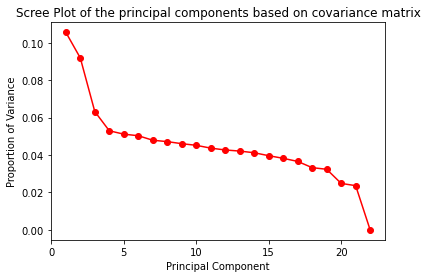

--- 0.2180006504058838 seconds ---


In [71]:
start_time = time.time()

pca = PCA(n_components=component_no)

principalComponents = pca.fit_transform(x)

prop_var = pca.explained_variance_ratio_
eig_values = pca.explained_variance_
s_values = pca.singular_values_

PC_numbers = np.arange(pca.n_components_) + 1

Scree_plot(PC_numbers, prop_var)

print("--- %s seconds ---" % (time.time() - start_time))


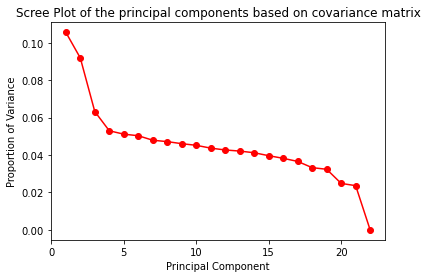

--- 0.16900300979614258 seconds ---


In [73]:
start_time = time.time()

cov_matrix = np.cov(x.transpose(), bias=True)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

total_eigv = sum(eigen_values)
proportion = abs(eigen_values) / total_eigv

Scree_plot(PC_numbers, prop_var)

print("--- %s seconds ---" % (time.time() - start_time))


array([2.32348978e+00, 2.02172516e+00, 1.39160937e+00, 1.16537321e+00,
       1.12547686e+00, 1.10723761e+00, 1.05419022e+00, 1.03783808e+00,
       1.01361552e+00, 9.94407888e-01, 9.61364431e-01, 9.39653520e-01,
       9.26747161e-01, 9.06978530e-01, 8.72456257e-01, 8.41532462e-01,
       8.05033048e-01, 7.31786768e-01, 7.12824151e-01, 5.46556900e-01,
       5.20326941e-01, 1.46106179e-31])

### 5.2 Plot the principal components in a scatterplot.

Plot the first K principal components in a scatterplot, and interpret the result

### 5.3 Confidence Region for the principal components

Find a 95% confidence region for the first K principal components, , and interpret the result

### 6 The Regression Model and Findings

Select a regression model and explain it

Optional: verify the selected model, resample testing data, verify the predictions of the model, construct a confusion matrix. 

Compare the speeds of QR, SVD and parallel programming for QR and SVD


### 7 Conclusion

which column(s) is/are significant to cause heart heart disease, which columns the public should pay attention to? How many dimensions have been reduced after doing PCA. which matrix factorization is most efficient for PCA? Does parallel programming help improving the computation? etc. 

### 7.  Work Cited

Pytlak, Kamil. “Personal Key Indicators of Heart Disease.” Kaggle, 16 Feb. 2022, www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. 



In [31]:
missng_values

HeartDisease                           0
BMI                                    0
Smoking                                0
AlcoholDrinking                        0
Stroke                                 0
PhysicalHealth                         0
MentalHealth                           0
DiffWalking                            0
Sex                                    0
AgeCategory                            0
Diabetic                               0
PhysicalActivity                       0
GenHealth                              0
SleepTime                              0
Asthma                                 0
KidneyDisease                          0
SkinCancer                             0
Race_American Indian/Alaskan Native    0
Race_Asian                             0
Race_Black                             0
Race_Hispanic                          0
Race_Other                             0
Race_White                             0
dtype: int64